## ДЗ 1 "Полносвязные нейронные сети"

ФИО: **Тренёв Иван Сергеевич**

В этом задании вам предстоит реализовать проход "вперед" для полносвязной нейронную сети. В дальнейшем мы реализуем процедуру обучения и научим сеть распознавать рукописные цифры.

На первой лекции мы познакомились с тем, что такое нейронные сети и изучили три слоя — линейный, сигмоида и SoftMax. Из этих слоев можно составлять глубокие архитектуры и обучать их при помощи градиентного спуска. Чтобы конструировать сложные архитектуры, можно реализовать каждый тип слоя как отдельный "кирпичик" и затем собирать полную архитектуру как конструктор. Это мы и попробуем сделать на первом и втором семинарах.

Каждый тип слоя мы будем реализовывать при помощи класса, который будет поддерживать три функции: forward, которая будет применять функцию, реализуемую слоем, к входной матрице и backward, которая будет вычислять градиенты и step, которая будет обновлять веса. Чтобы не применять функцию к каждому объекту в отдельности, мы будем подавать на вход слою матрицу размера (N, d), где N — количество объектов, а d — размерность каждого объекта.

<img src=backprop.pdf width=400/>

Функция forward будет вычислять по $x$ значение $y$, backward — по $\frac{\partial L}{\partial y}$ вычислять $\frac{\partial L}{\partial x}$ и обновлять внутри себя $\frac{\partial L}{\partial w}$.

Важным требованием к реализации является векторизация всех слоев: все операции должны быть сведены к матричным, не должно быть циклов. Это значительно уменьшает временные затраты.

In [227]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Часть 1: Линейный слой


Приведем пример вычисления градиентов для линейного слоя: $y = Wx$, $x \in \mathbb{R}^{K \times n}$, $y \in \mathbb{R}^{K \times n}$, $W \in \mathbb{R}^{n \times m}$, где $K$ — число объектов.

Рассмотрим $L$ как функцию от выходов нейронной сети: $L = L(y_{11}, y_{12}, \dots)$

$$y_{kt} = (Wx)_{kt} = \sum_{z=1}^{n} x_{kz}W_{zt}$$

$$\frac{\partial L}{\partial x_{ij}} = \sum_{kt} \frac{\partial L}{\partial y_{kt}}\frac{\partial y_{kt}}{\partial x_{ij}} = \sum_{kt} \frac{\partial L}{\partial y_{kt}}\frac{\partial \sum_z x_{kz}w_{zt}}{\partial x_{ij}}= \sum_{t} \frac{\partial L}{\partial y_{it}}\frac{\partial w_{jt}}{\partial x_{ij}}$$

$$\frac{\partial{L}}{\partial x} = \frac{\partial{L}}{\partial y}W^T$$

In [228]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        self.W = np.random.randn(input_size, output_size) * 0.1
        self.b = np.zeros(output_size)
        #### YOUR CODE HERE
        #### Create weights, initialize them with samples from N(0, 0.1).
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size).
        Returns output of size (N, output_size).
        Hint: You may need to store X for backward pass
        '''
        self.X = X
        self.Y = X @ self.W + self.b
        #### YOUR CODE HERE
        #### Apply layer to input
        return self.Y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        #### YOUR CODE HERE
        self.dLdW = self.X.T.dot(dLdy)
        self.dLdb = np.sum(dLdy, 0)

        dLdx = dLdy @ self.W.T
        
        return dLdx
    
    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - l*dLdw
        '''
        #### YOUR CODE HERE
        self.W -= learning_rate * self.dLdW
        self.b -= learning_rate * self.dLdb
        pass

### Часть 2: Численный градиент

Релизуйте функцию проверки численного градиента. Для этого для каждой переменной, по которой считается градиент, надо вычислить численный градиент: $f'(x) \approx \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$. Функция должна возвращать максимальное абсолютное отклонение аналитического градиента от численного. В качестве $\epsilon$ рекомендуется взять $10^{-6}$. При правильной реализации максимальное отличие будет иметь порядок $10^{-8}-10^{-6}$.

In [229]:
def check_gradient(func, X, gradient):
    '''
    Computes numerical gradient and compares it with analytcal.
    func: callable, function of which gradient we are interested. Example call: func(X)
    X: np.array of size (n x m)
    gradient: np.array of size (n x m)
    Returns: maximum absolute diviation between numerical gradient and analytical.
    '''
    #### YOUR CODE HERE
    eps = 10**(-6)

    # X = X.reshape(-1, X.shape[0])
    # gradient = gradient.reshape(-1, gradient.shape[0])
    
    num_gradient = np.zeros(X.shape)

    for i in range(X.shape[0]):
      for j in range(X.shape[1]):
        X[i,j] += eps
        func_plus = func(X)
        X[i,j] -= 2 * eps
        func_minus = func(X)
        X[i,j] += eps
      
        num_gradient[i,j] = (func_plus - func_minus) / (2 * eps) 
    return np.max(np.abs(num_gradient - gradient))

Протестируйте линейный слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$ и $\frac{\partial L}{\partial w}$.

In [230]:
#### YOUR CODE HERE

layer = Linear(3, 2)

X = np.random.randn(1,3)

def f(W, layer=layer, X=X):
    return np.sum(layer.forward(X))

def f_1(X):
    return np.sum(layer.forward(X))

res = layer.forward(X)
dLdy = np.ones((1,2))
dLdx = layer.backward(dLdy)

print(f'dL/dx: {check_gradient(f_1, np.copy(X), dLdx)}')
print(f'dL/dw: {check_gradient(f, layer.W, layer.dLdW)}')

dL/dx: 3.1068758676866537e-12
dL/dw: 2.079225680517993e-12


### Часть 3: Сигмоида

In [231]:
def sigm(x):
  return 1 / (1 + np.exp(-x))

class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        #### YOUR CODE HERE
        #### Apply layer to input
        self.Y = sigm(X)

        return self.Y
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        #### YOUR CODE HERE
        dLdx = dLdy * self.Y * (1 - self.Y)

        return dLdx
    
    def step(self, learning_rate):
        pass

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [232]:
#### YOUR CODE HERE

layer_sigm = Sigmoid()

X = np.random.randn(2,3)

def f(X):
    return np.sum(layer_sigm.forward(X) ** 2)

res = layer_sigm.forward(X)
dLdy = np.ones(3)
dLdx = layer_sigm.backward(dLdy)

print(f'dL/dx: {check_gradient(f, np.copy(X), dLdx)}')

dL/dx: 0.0921502300782161


### Часть 4: Функция потерь

Как мы увидели на семинаре, вычисление производной для связки SoftMax + Negative log-likelihood проще чем для этих двух слоев по отдельности. Поэтому мы реализуем их как один класс. Важное замечание: на проходе "вперед" важно воспользоваться трюком <a href="https://blog.feedly.com/tricks-of-the-trade-logsumexp/">log-sum-exp</a>, чтобы не столкнуться с численными неустойчивостями.

In [233]:
class NLLLoss:
    def __init__(self):

        pass
    
    def forward(self, X, y):

        C = np.mean(X)

        self.log_softmax = X - np.log(np.sum(np.exp(X - C), axis=1, keepdims=True)) - C
        self.OHE_y = np.eye(X.shape[1])[y]

        return -np.mean(np.sum(self.log_softmax * self.OHE_y, 1), 0)
    
    def backward(self):

        dLdx = (np.exp(self.log_softmax) - self.OHE_y) / self.OHE_y.shape[0]

        return dLdx


class MSELoss:
    def __init__(self):
        pass
    
    def forward(self, X, y):

        self.n = X.shape[0]
        y = y.reshape(y.shape[0], -1)
        self.diff = X - y

        return np.mean(self.diff**2)
    
    def backward(self):

        dLdx = (2 * self.diff) / self.n

        return dLdx

Протестируйте слой при помощи реализованной функции check_gradient: $\frac{\partial L}{\partial x}$.

In [234]:
#### YOUR CODE HERE
X = np.random.rand(10, 2)
y = np.random.randint(0, 2, 10)
L = NLLLoss()

def f(X):
    return L.forward(X, y)

res = L.forward(X, y)
d_res = L.backward()

print(check_gradient(f, np.copy(X), d_res))

5.7658919305758616e-11


### Часть 5, нейронная сеть

Теперь, когда у нас есть "кирпичики", мы можем написать класс, который будет собирать всю сеть вместе 

In [235]:
class NeuralNetwork:
    def __init__(self, modules):
        '''
        Constructs network with *modules* as its layers
        '''
        #### YOUR CODE HERE
        self.modules = list(modules)
    
    def forward(self, X):
        #### YOUR CODE HERE
        #### Apply layers to input
        for module in self.modules:
          X = module.forward(X)

        return X

    def backward(self, dLdy):
        '''
        dLdy here is a gradient from loss function
        '''
        #### YOUR CODE HERE
        for module in self.modules[::-1]:
          dLdy = module.backward(dLdy)
    
    def step(self, learning_rate):
        for module in self.modules:
          module.step(learning_rate)

### Часть 6, обучение на простых данных

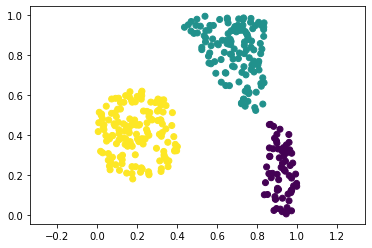

In [236]:
data = np.load('data.npz')
X, y = data['arr_0'], data['arr_1']
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

Обучите архитектуру вида 2 -> 10 -> 10 -> 3:
* Linear(2, 10)
* Sigmoid()
* Linear(10, 10)
* Sigmoid()
* Linear(10, 3)

В качестве функции потерь используйте NLLLoss.
1. Создайте сеть, в цикле запускайте forward, backward, step (используйте learning rate 0.005). 
2. Нарисуйте график сходимости (величина NLL после каждого обновления).
3. Нарисуйте разделяющую поверхность
4. Попробуйте подобрать темп обучения. Как меняется сходимость?

* Подоберите темп обучения. Как меняется сходимость? Нарисуйте график оптимального значения функции потерь для различных значений learning_rate
* Решите поставленную выше задачу как задачу регрессии с MSE. Изменилась ли разделяющая поверхность?

In [237]:
def realization(Name, Loss, numb_epoch = 20000, step = 0.05):

  nn = NeuralNetwork([Linear(2, 10), Sigmoid(), Linear(10, 10), Sigmoid(), Linear(10, 3)])

  loss = Loss
  losses = []

  # Обучение
  for epoch in range(numb_epoch):
    pred = nn.forward(X)
    L = loss.forward(pred, y)
    losses.append(L)
    dLdy = loss.backward()
    nn.backward(dLdy)
    nn.step(step)

  print(f"Loss: {losses[-1]}")


  # Отрисовка графика сходимости
  plt.plot(range(numb_epoch), losses)
  plt.title(f"{Name} function")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.show()


  print()
  # Отрисовка разделающей поверхности
  xy_step = 100

  XY_grid = np.meshgrid(np.linspace(np.min(X[:,0]) - 0.1, np.max(X[:,0]) + 0.1, xy_step), 
                              np.linspace(np.min(X[:,1]) - 0.1, np.max(X[:,1]) + 0.1, xy_step))

  X_test = np.dstack((XY_grid[0], XY_grid[1])).reshape(xy_step ** 2, 2)
  if Name == "NLL":
    y_test = np.argmax(nn.forward(X_test), 1)
  else:
    y_test = np.round(nn.forward(X_test))[:,1]


  plt.title("Separating surface")
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.1)
  plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1)
  plt.show()

### NLLLoss

Loss: 1.0519918883721133


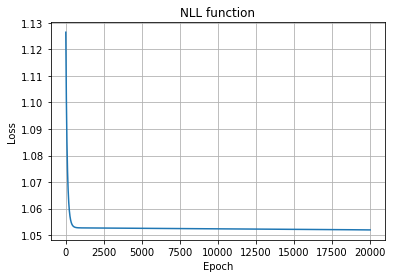

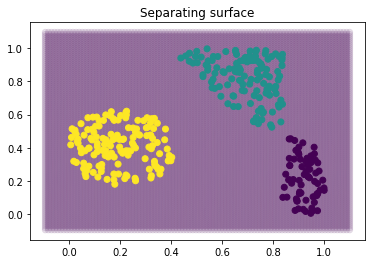

In [238]:
realization("NLL", NLLLoss(), 20000, 0.005)

Loss: 0.01023477258751783


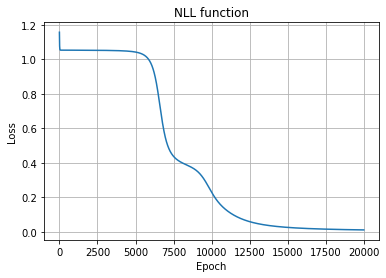

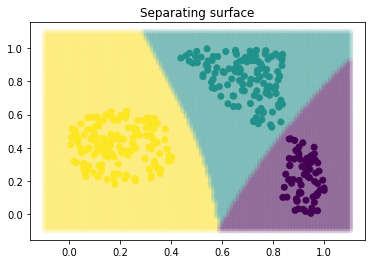

In [239]:
realization("NLL", NLLLoss(), 20000, 0.05)

Loss: 0.00029628844966387386


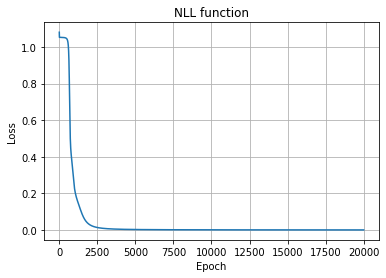

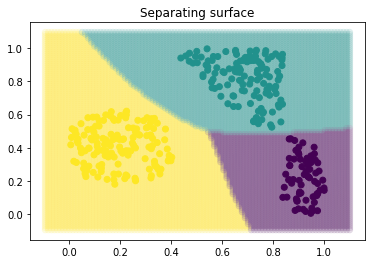

In [240]:
realization("NLL", NLLLoss(), 20000, 0.5)

*   learning rate 0.005 не достаточно, для решения поставленной задачи;
*   learning rate 0.05 и 0.5 намного лучше




### MSELoss

Loss: 0.046690920740841545


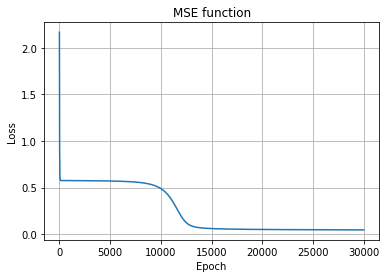

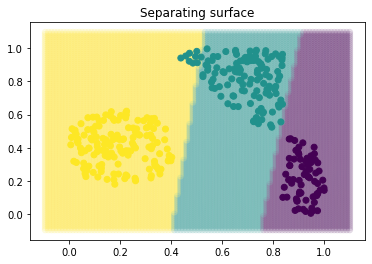

In [241]:
realization("MSE", MSELoss(), 30000, 0.005)

Loss: 0.010569764556611383


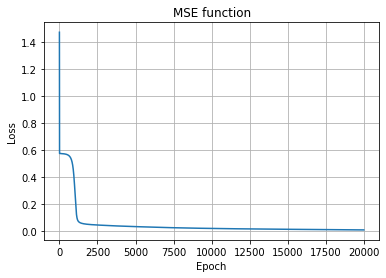

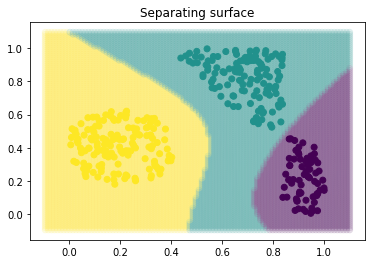

In [242]:
realization("MSE", MSELoss(), 20000, 0.05)

Похожая ситуация с MSE: 0.005 не хватает, но тут намного лучше, классификация происходит, но с ошибками